In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
imagem = cv2.imread('..\FFVI\\Maps\\caverna_interior2.jpg')
# Converta a imagem para o espaço de cores HSV
hsv = cv2.cvtColor(imagem, cv2.COLOR_BGR2HSV)

# Definir a faixa de cores do protagonista (verde, por exemplo)
limite_inferior = np.array([40, 50, 50])  # Faixa inferior de valores de HSV para verde
limite_superior = np.array([80, 255, 255])  # Faixa superior de valores de HSV para verde

# Criar uma máscara usando a faixa de cores definida
mascara = cv2.inRange(hsv, limite_inferior, limite_superior)

# Encontrar contornos na máscara
contornos, _ = cv2.findContours(mascara, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Encontrar o contorno com a maior área (presumindo que seja o protagonista)
if contornos:
    maior_contorno = max(contornos, key=cv2.contourArea)
    # Desenhar um retângulo ao redor do contorno
    x, y, w, h = cv2.boundingRect(maior_contorno)
    cv2.rectangle(imagem, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Mostrar a imagem com o retângulo ao redor do protagonista
cv2.imshow('Detecção do Protagonista', imagem)
cv2.waitKey(0)
cv2.destroyAllWindows()

<>:4: SyntaxWarning: invalid escape sequence '\F'
<>:4: SyntaxWarning: invalid escape sequence '\F'
C:\Users\cdsim\AppData\Local\Temp\ipykernel_8184\4273811459.py:4: SyntaxWarning: invalid escape sequence '\F'
  imagem = cv2.imread('..\FFVI\\Maps\\caverna_interior2.jpg')


<>:5: SyntaxWarning: invalid escape sequence '\F'
<>:5: SyntaxWarning: invalid escape sequence '\F'
C:\Users\cdsim\AppData\Local\Temp\ipykernel_10064\3995107264.py:5: SyntaxWarning: invalid escape sequence '\F'
  imagem = cv2.imread('..\FFVI\\Maps\\planicie3.jpg') # Substitua 'screenshot.jpg' pelo nome do arquivo da sua captura de tela


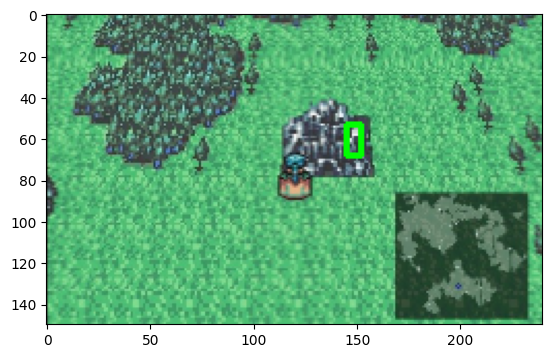

In [53]:
import cv2
import numpy as np

# Carregar a imagem da tela do jogo
imagem = cv2.imread('..\FFVI\\Maps\\planicie3.jpg') # Substitua 'screenshot.jpg' pelo nome do arquivo da sua captura de tela
imagem = cv2.resize(imagem, (240,150))
# Converter a imagem para tons de cinza
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# Definir uma região de interesse (ROI) ao redor do centro da tela
centro_x, centro_y = imagem.shape[1] // 2, imagem.shape[0] // 2
tamanho_roi = 70
roi = imagem_cinza[centro_y - tamanho_roi//2:centro_y + tamanho_roi//2,
                   centro_x - tamanho_roi//2:centro_x + tamanho_roi//2]

# Aplicar detecção de bordas na ROI (por exemplo, usando Canny)
bordas = cv2.Canny(roi, 1000, 1, 10)

# Encontrar contornos na imagem de bordas
contornos, _ = cv2.findContours(bordas, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Procurar o contorno com a maior área
maior_contorno = max(contornos, key=cv2.contourArea)

# Obter o retângulo delimitador do contorno
x, y, w, h = cv2.boundingRect(maior_contorno)

# Desenhar o retângulo delimitador na imagem original
cv2.rectangle(imagem, (centro_x - tamanho_roi//2 + x, centro_y - tamanho_roi//2 + y),
              (centro_x - tamanho_roi//2 + x + w, centro_y - tamanho_roi//2 + y + h), (0, 255, 0), 2)

# # Mostrar a imagem com o retângulo ao redor do protagonista identificado
# cv2.imshow('Protagonista Identificado', imagem)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(imagem)

In [80]:
import cv2
import numpy as np

# Carregar a imagem da tela do jogo
imagem = cv2.imread('..\FFVI\\Maps\\planicie3.jpg') # Substitua 'screenshot.jpg' pelo nome do arquivo da sua captura de tela
imagem = cv2.resize(imagem, (240,150))

# Converter a imagem para tons de cinza
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# Aplicar detecção de bordas usando o método de Canny
bordas = cv2.Canny(imagem_cinza, 100, 200)

# Encontrar contornos na imagem de bordas
contornos, _ = cv2.findContours(bordas, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Definir as dimensões do retângulo central
centro_x, centro_y = imagem.shape[1] // 2, imagem.shape[0] // 2
dimensoes_retangulo = (40, 40)  # Altere estas dimensões conforme necessário

# Filtrar contornos que estão dentro do retângulo central
contornos_filtrados = []
for contorno in contornos:
    x, y, w, h = cv2.boundingRect(contorno)
    if (centro_x - dimensoes_retangulo[0] // 2) < (x + w // 2) < (centro_x + dimensoes_retangulo[0] // 2) and \
       (centro_y - dimensoes_retangulo[1] // 2) < (y + h // 2) < (centro_y + dimensoes_retangulo[1] // 2):
        contornos_filtrados.append(contorno)

# Desenhar retângulos ao redor dos contornos filtrados na imagem original
for contorno in contornos_filtrados:
    x, y, w, h = cv2.boundingRect(contorno)
    cv2.rectangle(imagem, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Mostrar a imagem com os retângulos ao redor dos contornos filtrados
cv2.imshow('Contornos próximos ao centro da tela', imagem)
cv2.waitKey(0)
cv2.destroyAllWindows()


<>:5: SyntaxWarning: invalid escape sequence '\F'
<>:5: SyntaxWarning: invalid escape sequence '\F'
C:\Users\cdsim\AppData\Local\Temp\ipykernel_10064\2542602814.py:5: SyntaxWarning: invalid escape sequence '\F'
  imagem = cv2.imread('..\FFVI\\Maps\\planicie3.jpg') # Substitua 'screenshot.jpg' pelo nome do arquivo da sua captura de tela


In [109]:
import cv2
import numpy as np

# Carregar a imagem da tela do jogo
imagem = cv2.imread('..\FFVI\\Maps\\caverna_interior2.jpg') # Substitua 'screenshot.jpg' pelo nome do arquivo da sua captura de tela
imagem = cv2.resize(imagem, (240,150))

# Converter a imagem para tons de cinza
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# Aplicar detecção de bordas usando o método de Canny
bordas = cv2.Canny(imagem_cinza, 100, 200)

# Encontrar contornos na imagem de bordas
contornos, _ = cv2.findContours(bordas, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Definir as dimensões do retângulo central
centro_x, centro_y = imagem.shape[1] // 2, imagem.shape[0] // 2
dimensoes_retangulo = (40, 40)  # Altere estas dimensões conforme necessário

# Definir dimensões mínimas do contorno
dimensao_minima = (10, 10)
dimensao_maxima = (60, 60)
# Filtrar contornos que estão dentro do retângulo central e atendem às dimensões mínimas
contornos_filtrados = []
for contorno in contornos:
    x, y, w, h = cv2.boundingRect(contorno)
    if (centro_x - dimensoes_retangulo[0] // 2) < (x + w // 2) < (centro_x + dimensoes_retangulo[0] // 2) and \
       (centro_y - dimensoes_retangulo[1] // 2) < (y + h // 2) < (centro_y + dimensoes_retangulo[1] // 2) and \
       dimensao_maxima[0] > w >= dimensao_minima[0] and dimensao_maxima[1] > h >= dimensao_minima[1]:
        contornos_filtrados.append(contorno)

# Desenhar retângulos ao redor dos contornos filtrados na imagem original
for contorno in contornos_filtrados:
    x, y, w, h = cv2.boundingRect(contorno)
    cv2.rectangle(imagem, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Mostrar a imagem com os retângulos ao redor dos contornos filtrados
cv2.imshow('Contornos próximos ao centro da tela', imagem)
cv2.waitKey(0)
cv2.destroyAllWindows()


<>:5: SyntaxWarning: invalid escape sequence '\F'
<>:5: SyntaxWarning: invalid escape sequence '\F'
C:\Users\cdsim\AppData\Local\Temp\ipykernel_10064\1663456950.py:5: SyntaxWarning: invalid escape sequence '\F'
  imagem = cv2.imread('..\FFVI\\Maps\\caverna_interior2.jpg') # Substitua 'screenshot.jpg' pelo nome do arquivo da sua captura de tela


# Treinar ML

In [15]:
import requests
from bs4 import BeautifulSoup
import os

base_urls = {
    'Terra': 'https://www.videogamesprites.net/FinalFantasy6/Party/Terra/',
    'Locke': 'http://www.videogamesprites.net/FinalFantasy6/Party/Locke/',
    'Edgar': 'http://www.videogamesprites.net/FinalFantasy6/Party/Edgar/',
    'Sabin': 'http://www.videogamesprites.net/FinalFantasy6/Party/Sabin/',
    'Celes': 'http://www.videogamesprites.net/FinalFantasy6/Party/Celes/',
    'Shadow': 'http://www.videogamesprites.net/FinalFantasy6/Party/Shadow/',
    'Cyan': 'http://www.videogamesprites.net/FinalFantasy6/Party/Cyan/',
    'Gau': 'http://www.videogamesprites.net/FinalFantasy6/Party/Gau/',
    'Setzer': 'http://www.videogamesprites.net/FinalFantasy6/Party/Setzer/',
    'Mog': 'http://www.videogamesprites.net/FinalFantasy6/Party/Mog/',
    'Strago': 'http://www.videogamesprites.net/FinalFantasy6/Party/Strago/',
    'Relm': 'http://www.videogamesprites.net/FinalFantasy6/Party/Relm/',
    'Gogo': 'http://www.videogamesprites.net/FinalFantasy6/Party/Gogo/',
    'Umaro': 'http://www.videogamesprites.net/FinalFantasy6/Party/Umaro/'
}

# Pasta onde as imagens serão salvas
output_folder = '..\\FFVI\\Sprites'

# Função para baixar as imagens para um personagem específico
def download_images(player, base_url):
    # Criar a pasta para o jogador atual
    player_folder = os.path.join(output_folder, player)
    os.makedirs(player_folder, exist_ok=True)
    
    # Fazer a requisição para obter o conteúdo HTML da página
    response = requests.get(base_url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Encontrar todas as tags de imagem na página
    img_tags = soup.find_all('img')
    
    # Obter os URLs das imagens
    image_urls = [img['src'] for img in img_tags]
    
    # Baixar as imagens
    for image_url in image_urls:
        # Verificar se o URL tem um esquema especificado
        if not image_url.startswith(('http://', 'https://')):
            # Se o URL for relativo, construir o URL completo usando a base_url
            image_url = base_url + image_url
        
        # Caminho para salvar a imagem
        img_name = os.path.join(player_folder, os.path.basename(image_url))
        
        # Baixar e salvar a imagem
        with open(img_name, 'wb') as f:
            response = requests.get(image_url)
            f.write(response.content)
            print(f'Imagem "{img_name}" baixada com sucesso para o jogador "{player}"!')

# Baixar imagens de todos os personagens
for player, base_url in base_urls.items():
    download_images(player, base_url)


Imagem "..\FFVI\Sprites\Terra\Terra - Status.gif" baixada com sucesso para o jogador "Terra"!
Imagem "..\FFVI\Sprites\Terra\Terra - Credits.gif" baixada com sucesso para o jogador "Terra"!
Imagem "..\FFVI\Sprites\Terra\Terra (Front).gif" baixada com sucesso para o jogador "Terra"!
Imagem "..\FFVI\Sprites\Terra\Terra (Left).gif" baixada com sucesso para o jogador "Terra"!
Imagem "..\FFVI\Sprites\Terra\Terra (Back).gif" baixada com sucesso para o jogador "Terra"!
Imagem "..\FFVI\Sprites\Terra\Terra - Walk (Front).gif" baixada com sucesso para o jogador "Terra"!
Imagem "..\FFVI\Sprites\Terra\Terra - Walk (Left).gif" baixada com sucesso para o jogador "Terra"!
Imagem "..\FFVI\Sprites\Terra\Terra - Walk (Back).gif" baixada com sucesso para o jogador "Terra"!
Imagem "..\FFVI\Sprites\Terra\Terra - Sad (Front).gif" baixada com sucesso para o jogador "Terra"!
Imagem "..\FFVI\Sprites\Terra\Terra - Sad (Left).gif" baixada com sucesso para o jogador "Terra"!
Imagem "..\FFVI\Sprites\Terra\Terra - S

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import os

# Definir uma transformação para pré-processamento das imagens
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),  # Converter para RGB
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
# Definir um Dataset personalizado para lidar com GIFs
class GIFDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.gif_files = []
        self.labels = []
        self.label_map = {}
        label_idx = 0
        for dirpath, _, filenames in os.walk(root_dir):
            for filename in filenames:
                if filename.endswith('.gif'):
                    gif_path = os.path.join(dirpath, filename)
                    self.gif_files.append(gif_path)
                    # Extrair o nome da pasta como rótulo (personagem)
                    label = os.path.basename(os.path.dirname(gif_path))
                    if label not in self.label_map:
                        self.label_map[label] = label_idx
                        label_idx += 1
                    self.labels.append(self.label_map[label])

    def __len__(self):
        return len(self.gif_files)

    def __getitem__(self, idx):
        gif_path = self.gif_files[idx]
        gif_frames = Image.open(gif_path)
        if self.transform:
            gif_frames = self.transform(gif_frames)
        # Convertendo o rótulo para um tensor
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return gif_frames, label

# Carregar os dados do diretório onde os GIFs estão salvos
output_folder = '..\\FFVI\\Sprites'
gif_dataset = GIFDataset(root_dir=output_folder, transform=transform)

# Dividir os dados em conjuntos de treinamento e validação
total_size = len(gif_dataset)
train_size = int(0.8 * total_size)
val_size = total_size - train_size

if train_size == 0 or val_size == 0:
    raise ValueError("Não há amostras suficientes para criar conjuntos de treinamento e validação.")

train_dataset, val_dataset = torch.utils.data.random_split(gif_dataset, [train_size, val_size])

# Criar dataloaders para carregar os dados
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False, num_workers=0)

# Definir o modelo de rede neural
model = models.resnet18(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 14)  # 14 classes de personagens

# Definir a função de perda e otimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Treinar o modelo
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}")

# Avaliar o modelo
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in val_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
accuracy = correct / total
print(f'Acurácia no conjunto de validação: {100 * accuracy:.2f}%')


Epoch 1/10, Loss: 1.9571308107659369
Epoch 2/10, Loss: 0.6714154355596788
Epoch 3/10, Loss: 0.2654896619443846
Epoch 4/10, Loss: 0.22812839664592602


KeyboardInterrupt: 

In [109]:
# import torch
# import torchvision
# from torchvision.models.detection import FasterRCNN
# from torchvision.transforms import functional as F
# from PIL import Image, ImageSequence
# import os
# from tqdm import tqdm

# # Função para carregar os dados do diretório onde os GIFs estão salvos
# def load_data(root_dir):
#     gif_files = []
#     classes = []
#     class_to_idx = {}
#     class_idx = 0
#     for class_dir in os.listdir(root_dir):
#         class_path = os.path.join(root_dir, class_dir)
#         if os.path.isdir(class_path):
#             if class_dir not in class_to_idx:
#                 class_to_idx[class_dir] = class_idx
#                 class_idx += 1
#             for filename in os.listdir(class_path):
#                 if filename.endswith('.gif'):
#                     gif_files.append(os.path.join(class_path, filename))
#                     classes.append(class_to_idx[class_dir])
#     return gif_files, classes

# # Função para carregar anotações (ajuste conforme necessário)
# def load_annotations(annotation_dir):
#     annotations = {}
#     for dirpath, _, filenames in os.walk(annotation_dir):
#         for filename in filenames:
#             if filename.endswith('.txt'):
#                 filepath = os.path.join(dirpath, filename)
#                 with open(filepath, 'r') as f:
#                     annotations[filename.split('.')[0]] = f.read().splitlines()
#     return annotations

# # Carregar os dados
# output_folder = '..\\FFVI\\Sprites'
# annotation_folder = '..\\FFVI\\Annotations'
# gif_files, classes = load_data(output_folder)
# annotations = load_annotations(annotation_folder)

# # Transformação para converter os GIFs em tensores
# transform = torchvision.transforms.ToTensor()

# # Converter GIFs em tensores e carregar anotações
# tensor_gifs = []
# targets = []
# for gif_file, gif_class in tqdm(zip(gif_files, classes), desc="Converting GIFs to Tensors", total=len(gif_files)):
#     gif_frames = Image.open(gif_file)
#     resized_frames = [frame.copy().resize((224, 224)) for frame in ImageSequence.Iterator(gif_frames)]
#     gif_annotations = annotations[os.path.basename(gif_file).split('.')[0]]
#     for idx, resized_frame in enumerate(resized_frames):
#         tensor_gif_frame = transform(resized_frame)
#         tensor_gifs.append(tensor_gif_frame)
        
#         # Carregar anotações para cada frame
#         boxes = []
#         labels = []
#         for annotation in gif_annotations:
#             parts = annotation.split()
#             boxes.append([float(parts[1]), float(parts[2]), float(parts[3]), float(parts[4])])
#             labels.append(int(parts[0]))
        
#         target = {"boxes": torch.tensor(boxes, dtype=torch.float32),
#                   "labels": torch.tensor(labels, dtype=torch.int64)}
#         targets.append(target)

# # Ajustar tamanho dos tensores dos GIFs
# max_width = max(tensor.shape[2] for tensor in tensor_gifs)
# max_height = max(tensor.shape[1] for tensor in tensor_gifs)
# for i, tensor in enumerate(tensor_gifs):
#     width_pad = max_width - tensor.shape[2]
#     height_pad = max_height - tensor.shape[1]
#     padded_tensor = F.pad(tensor, (0, width_pad, 0, height_pad))
#     tensor_gifs[i] = padded_tensor

# # Ajustar a profundidade dos tensores dos GIFs
# max_depth = max(tensor.shape[0] for tensor in tensor_gifs)
# for i, tensor in enumerate(tensor_gifs):
#     depth_pad = max_depth - tensor.shape[0]
#     padded_tensor = F.pad(tensor, (0, 0, 0, 0, depth_pad, 0))
#     tensor_gifs[i] = padded_tensor

# # Empilhar os tensores dos GIFs
# dataset = torch.utils.data.TensorDataset(torch.stack(tensor_gifs, dim=0), targets)

# # Definir o modelo Faster R-CNN pré-treinado na COCO
# model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

# # Modificar o número de classes na camada de saída do modelo
# num_classes = len(set(classes))  # Número de classes de personagens
# in_features = model.roi_heads.box_predictor.cls_score.in_features
# model.roi_heads.box_predictor = torchvision.models.detection.faster_rcnn.FastRCNNPredictor(in_features, num_classes)

# # Treinar o modelo por 10 épocas
# device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
# model.to(device)
# model.train()
# data_loader = torch.utils.data.DataLoader(dataset, batch_size=2, shuffle=True, num_workers=4, collate_fn=lambda x: tuple(zip(*x)))

# num_epochs = 10
# optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# for epoch in range(num_epochs):
#     print(f"Epoch {epoch+1}/{num_epochs}")
#     for images, targets in data_loader:
#         images = list(image.to(device) for image in images)
#         targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
#         loss_dict = model(images, targets)
#         losses = sum(loss for loss in loss_dict.values())
#         losses.backward()
#         optimizer.step()
#         optimizer.zero_grad()

# # Salvar o modelo treinado na pasta '..\\FFVI\\ModelosTorch'
# model_folder = '..\\FFVI\\ModelosTorch'
# os.makedirs(model_folder, exist_ok=True)
# model_path = os.path.join(model_folder, 'faster_rcnn_model.pth')
# torch.save(model.state_dict(), model_path)
# print(f"Modelo treinado salvo em: {model_path}")


In [86]:
import torch
import torchvision
from torchvision.models.detection import FasterRCNN
from torchvision.transforms import functional as F
from PIL import Image, ImageSequence
import os
from tqdm import tqdm
import random

# Função para carregar os dados do diretório onde os GIFs estão salvos
def load_data(root_dir):
    gif_files = []
    classes = []
    class_to_idx = {}
    class_idx = 0
    for class_dir in os.listdir(root_dir):
        class_path = os.path.join(root_dir, class_dir)
        if os.path.isdir(class_path):
            if class_dir not in class_to_idx:
                class_to_idx[class_dir] = class_idx
                class_idx += 1
            for filename in os.listdir(class_path):
                if filename.endswith('.gif'):
                    gif_files.append(os.path.join(class_path, filename))
                    classes.append(class_to_idx[class_dir])
    return gif_files, classes

# Função para criar anotações fictícias
def create_fake_annotations(num_annotations, width, height, class_idx):
    boxes = []
    labels = []
    for _ in range(num_annotations):
        xmin = random.uniform(0, width / 2)
        ymin = random.uniform(0, height / 2)
        xmax = random.uniform(width / 2, width)
        ymax = random.uniform(height / 2, height)
        boxes.append([xmin, ymin, xmax, ymax])
        labels.append(class_idx)
    return {"boxes": torch.tensor(boxes, dtype=torch.float32), "labels": torch.tensor(labels, dtype=torch.int64)}

# Função para colate_fn
def collate_fn(batch):
    return tuple(zip(*batch))

# Carregar os dados
output_folder = '../FFVI/Sprites'
gif_files, classes = load_data(output_folder)

# Transformação para converter os GIFs em tensores
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.ToTensor(),
])

# Converter GIFs em tensores e criar anotações fictícias
tensor_gifs = []
targets = []
num_classes = len(set(classes)) + 1  # Número de classes de personagens + 1 para o fundo
for gif_file, gif_class in tqdm(zip(gif_files, classes), desc="Converting GIFs to Tensors", total=len(gif_files)):
    gif_frames = Image.open(gif_file)
    resized_frames = [frame.copy().resize((224, 224)) for frame in ImageSequence.Iterator(gif_frames)]
    for resized_frame in resized_frames:
        tensor_gif_frame = transform(resized_frame)
        tensor_gifs.append(tensor_gif_frame)

        # Criar anotações fictícias para cada frame
        fake_annotation = create_fake_annotations(num_annotations=1, width=224, height=224, class_idx=gif_class)
        targets.append(fake_annotation)

# Ajustar tamanho dos tensores dos GIFs
max_width = max(tensor.shape[2] for tensor in tensor_gifs)
max_height = max(tensor.shape[1] for tensor in tensor_gifs)
for i, tensor in enumerate(tensor_gifs):
    width_pad = max_width - tensor.shape[2]
    height_pad = max_height - tensor.shape[1]
    tensor_gifs[i] = F.pad(tensor, (0, width_pad, 0, height_pad))

# Empilhar os tensores dos GIFs
dataset = [(tensor_gifs[i], targets[i]) for i in range(len(tensor_gifs))]

# Definir os valores corretos de média e desvio padrão para a normalização
# Esses valores são comuns para modelos pré-treinados na ImageNet
image_mean = [0.485, 0.456, 0.406]
image_std = [0.229, 0.224, 0.225]

# Definir o modelo Faster R-CNN pré-treinado na COCO com os valores corretos de média e desvio padrão
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True, 
                                                             image_mean=image_mean,
                                                             image_std=image_std)

# Modificar o número de classes na camada de saída do modelo
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = torchvision.models.detection.faster_rcnn.FastRCNNPredictor(in_features, num_classes)

# Treinar o modelo por 10 épocas
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)
model.train()
data_loader = torch.utils.data.DataLoader(dataset, batch_size=2, shuffle=True, num_workers=0, collate_fn=collate_fn)

num_epochs = 1000
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001, momentum=0.3)

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
   


Converting GIFs to Tensors:   0%|          | 0/632 [00:00<?, ?it/s]

Converting GIFs to Tensors: 100%|██████████| 632/632 [00:02<00:00, 296.54it/s]


Epoch 1/1000
Epoch 2/1000
Epoch 3/1000
Epoch 4/1000
Epoch 5/1000
Epoch 6/1000
Epoch 7/1000
Epoch 8/1000
Epoch 9/1000
Epoch 10/1000
Epoch 11/1000
Epoch 12/1000
Epoch 13/1000
Epoch 14/1000
Epoch 15/1000
Epoch 16/1000
Epoch 17/1000
Epoch 18/1000
Epoch 19/1000
Epoch 20/1000
Epoch 21/1000
Epoch 22/1000
Epoch 23/1000
Epoch 24/1000
Epoch 25/1000
Epoch 26/1000
Epoch 27/1000
Epoch 28/1000
Epoch 29/1000
Epoch 30/1000
Epoch 31/1000
Epoch 32/1000
Epoch 33/1000
Epoch 34/1000
Epoch 35/1000
Epoch 36/1000
Epoch 37/1000
Epoch 38/1000
Epoch 39/1000
Epoch 40/1000
Epoch 41/1000
Epoch 42/1000
Epoch 43/1000
Epoch 44/1000
Epoch 45/1000
Epoch 46/1000
Epoch 47/1000
Epoch 48/1000
Epoch 49/1000
Epoch 50/1000
Epoch 51/1000
Epoch 52/1000
Epoch 53/1000
Epoch 54/1000
Epoch 55/1000
Epoch 56/1000
Epoch 57/1000
Epoch 58/1000
Epoch 59/1000
Epoch 60/1000
Epoch 61/1000
Epoch 62/1000
Epoch 63/1000
Epoch 64/1000
Epoch 65/1000
Epoch 66/1000
Epoch 67/1000
Epoch 68/1000
Epoch 69/1000
Epoch 70/1000
Epoch 71/1000
Epoch 72/1000
E

In [108]:
# import cv2
# import matplotlib.pyplot as plt

# # Escolher um GIF de treino aleatório
# gif_idx = 0  # Índice do GIF de treino que você deseja testar
# gif_file = gif_files[gif_idx]

# # Carregar o GIF de treino escolhido
# gif_frames = Image.open(gif_file)
# gif_frames = [frame.copy().resize((224, 224)) for frame in ImageSequence.Iterator(gif_frames)]

# # Converter os frames do GIF para tensores
# tensor_frames = [transform(frame).unsqueeze(0).to(device) for frame in gif_frames]

# # Executar a inferência para cada frame do GIF
# model.eval()
# with torch.no_grad():
#     previsoes = [model(frame) for frame in tensor_frames]

# # Visualizar as previsões para cada frame do GIF
# for i, frame in enumerate(gif_frames):
#     frame_np = np.array(frame)
#     for previsao in previsoes[i]:
#         for box in previsao['boxes']:
#             xmin, ymin, xmax, ymax = box.cpu().numpy().astype(int)
#             cv2.rectangle(frame_np, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
#     plt.imshow(frame_np)
#     plt.axis('off')
#     plt.title(f'Frame {i+1}')
#     plt.show()


In [106]:
# import torch
# import torchvision.transforms as T
# from torchvision.models.detection import fasterrcnn_resnet50_fpn
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# # Carregar a imagem de treino
# imagem_treino = cv2.imread('..\FFVI\\Maps\\planicie.jpg')
# imagem_treino = cv2.resize(imagem_treino, (400,230))
# #imagem_treino = cv2.cvtColor(imagem_treino, cv2.COLOR_BGR2RGB)

# # Dimensões da região central para procurar personagens
# regiao_central_X = 700
# regiao_central_Y = 700

# # Definir as coordenadas da região central
# altura, largura, _ = imagem_treino.shape
# centro_X = largura // 2
# centro_Y = altura // 2
# xmin = max(0, centro_X - regiao_central_X // 2)
# ymin = max(0, centro_Y - regiao_central_Y // 2)
# xmax = min(largura, centro_X + regiao_central_X // 2)
# ymax = min(altura, centro_Y + regiao_central_Y // 2)

# # Recortar a região central da imagem
# regiao_central = imagem_treino[ymin:ymax, xmin:xmax]

# # Converter a região central em um tensor
# transform = T.Compose([T.ToTensor()])
# imagem_tensor = transform(regiao_central)

# # Carregar o modelo pré-treinado
# model = fasterrcnn_resnet50_fpn(pretrained=True)
# model.eval()

# # Fazer uma previsão
# with torch.no_grad():
#     prediction = model([imagem_tensor])

# # Desenhar os retângulos na imagem
# imagem_com_retangulo = regiao_central.copy()
# for box in prediction[0]['boxes']:
#     box = box.detach().numpy().astype(int)
#     xmin_box, ymin_box, xmax_box, ymax_box = box
#     # Ajustar as coordenadas do retângulo para a região central
#     xmin_box += xmin
#     xmax_box += xmin
#     ymin_box += ymin
#     ymax_box += ymin
#     cv2.rectangle(imagem_com_retangulo, (xmin_box, ymin_box), (xmax_box, ymax_box), (255, 0, 0), 2)

# # Exibir a imagem com o retângulo
# plt.imshow(imagem_com_retangulo)
# plt.axis('off')
# plt.show()


In [107]:
# import torch
# import torchvision.transforms as T
# from torchvision.models.detection import fasterrcnn_resnet50_fpn
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# # Carregar a imagem de treino
# imagem_treino = cv2.imread('..\FFVI\\Maps\\caverna_interior.jpg')
# imagem_treino = cv2.resize(imagem_treino, (400, 230))
# #imagem_treino = cv2.cvtColor(imagem_treino, cv2.COLOR_BGR2RGB)

# # Dimensões da região central para procurar personagens
# regiao_central_X = 700
# regiao_central_Y = 700

# # Definir as coordenadas da região central
# altura, largura, _ = imagem_treino.shape
# centro_X = largura // 2
# centro_Y = altura // 2
# xmin = max(0, centro_X - regiao_central_X // 2)
# ymin = max(0, centro_Y - regiao_central_Y // 2)
# xmax = min(largura, centro_X + regiao_central_X // 2)
# ymax = min(altura, centro_Y + regiao_central_Y // 2)

# # Recortar a região central da imagem
# regiao_central = imagem_treino[ymin:ymax, xmin:xmax]

# # Converter a região central em um tensor
# transform = T.Compose([T.ToTensor()])
# imagem_tensor = transform(regiao_central)

# # Carregar o modelo pré-treinado
# model = fasterrcnn_resnet50_fpn(pretrained=True)
# model.eval()

# # Fazer uma previsão
# with torch.no_grad():
#     prediction = model([imagem_tensor])

# # Desenhar os retângulos na imagem
# imagem_com_retangulo = regiao_central.copy()
# for box in prediction[0]['boxes']:
#     box = box.detach().numpy().astype(int)
#     xmin_box, ymin_box, xmax_box, ymax_box = box
#     # Calcular a largura e a altura do retângulo
#     largura_retangulo = xmax_box - xmin_box
#     altura_retangulo = ymax_box - ymin_box
#     # Desenhar somente os retângulos que têm dimensões menores que x e y
#     if largura_retangulo < 50 and altura_retangulo < 50:
#         # Ajustar as coordenadas do retângulo para a região central
#         xmin_box += xmin
#         xmax_box += xmin
#         ymin_box += ymin
#         ymax_box += ymin
#         cv2.rectangle(imagem_com_retangulo, (xmin_box, ymin_box), (xmax_box, ymax_box), (255, 0, 0), 2)

# # Exibir a imagem com os retângulos
# plt.imshow(imagem_com_retangulo)
# plt.axis('off')
# plt.show()


<>:9: SyntaxWarning: invalid escape sequence '\F'
<>:9: SyntaxWarning: invalid escape sequence '\F'
C:\Users\cdsim\AppData\Local\Temp\ipykernel_23220\371588680.py:9: SyntaxWarning: invalid escape sequence '\F'
  imagem_treino = cv2.imread('..\FFVI\\Maps\\caverna_interior2.jpg')


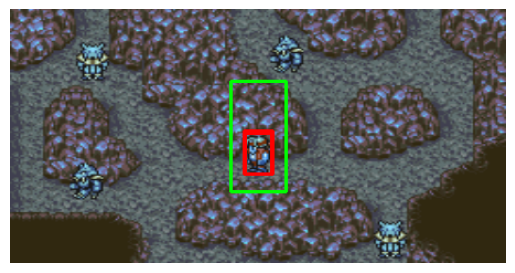

In [105]:
import torch
import torchvision.transforms as T
from torchvision.models.detection import fasterrcnn_resnet50_fpn
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem de treino
imagem_treino = cv2.imread('..\FFVI\\Maps\\caverna_interior2.jpg')
imagem_treino = cv2.resize(imagem_treino, (450, 230))
#imagem_treino = cv2.cvtColor(imagem_treino, cv2.COLOR_BGR2RGB)

# Dimensões da região central para procurar personagens
regiao_central_X = 900
regiao_central_Y = 900

# Definir as coordenadas da região central
altura, largura, _ = imagem_treino.shape
centro_X = largura // 2
centro_Y = altura // 2
xmin = max(0, centro_X - regiao_central_X // 2)
ymin = max(0, centro_Y - regiao_central_Y // 2)
xmax = min(largura, centro_X + regiao_central_X // 2)
ymax = min(altura, centro_Y + regiao_central_Y // 2)

# Recortar a região central da imagem
regiao_central = imagem_treino[ymin:ymax, xmin:xmax]

# Converter a região central em um tensor
transform = T.Compose([T.ToTensor()])
imagem_tensor = transform(regiao_central)

# Carregar o modelo pré-treinado
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Fazer uma previsão
with torch.no_grad():
    prediction = model([imagem_tensor])

# Dimensões da imagem
altura, largura, _ = imagem_treino.shape

# Dimensões da área desejada
x_area = 50  # Largura da área desejada
y_area = 100  # Altura da área desejada

# Calcular os limites da área centrada no centro da imagem
xmin_area = max(0, largura // 2 - x_area // 2)
xmax_area = min(largura, largura // 2 + x_area // 2)
ymin_area = max(0, altura // 2 - y_area // 2)
ymax_area = min(altura, altura // 2 + y_area // 2)

lista_retangulos = []
# Desenhar os retângulos apenas dentro da área definida
imagem_com_retangulo = regiao_central.copy()
for box in prediction[0]['boxes']:
    box = box.detach().numpy().astype(int)
    xmin_box, ymin_box, xmax_box, ymax_box = box
    largura_retangulo = xmax_box - xmin_box
    altura_retangulo = ymax_box - ymin_box
    # Desenhar somente os retângulos que têm dimensões menores que x e y
    if largura_retangulo < 50 and altura_retangulo < 50:
    # Verificar se as coordenadas do retângulo estão dentro da área específica
        if (xmin_area < xmin_box < xmax_area and
            ymin_area < ymin_box < ymax_area and
            xmin_area < xmax_box < xmax_area and
            ymin_area < ymax_box < ymax_area):
            # Desenhar somente os retângulos que estão dentro da área específica
            # Ajustar as coordenadas do retângulo para a região central
            xmin_box += xmin
            xmax_box += xmin
            ymin_box += ymin
            ymax_box += ymin
            lista_retangulos.append([(xmin_box, ymin_box), (xmax_box, ymax_box)])
            cv2.rectangle(imagem_com_retangulo, (xmin_box, ymin_box), (xmax_box, ymax_box), (255, 0, 0), 2)
cv2.rectangle(imagem_com_retangulo, (xmin_area, ymin_area), (xmax_area, ymax_area), (0, 255, 0), 2)
# Exibir a imagem com os retângulos
plt.imshow(imagem_com_retangulo)
plt.axis('off')
plt.show()


In [101]:
print(lista_retangulos)

[[(190, 114), (209, 148)], [(190, 113), (210, 149)]]
